## TODO: Add short intro to the notebook

# Set up the environment

## Import libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# TODO: hide warnings

## Set charts style

In [ ]:
# TODO

# Load & clean the data

## The European Commission data

In [63]:
ec_data = pd.read_csv('data/theeuropeancommission.csv')
ec_data.head()

,Title,Date,Category,Text
0,Joint press statement by the President of the ...,8 February 2024,STATEMENT,"On 8 February 2024 Her Excellency, President o..."
1,Press statement by President von der Leyen fol...,8 February 2024,STATEMENT,"President Ghazouani,\nThank you for your warm ..."
2,Opening remarks by President von der Leyen at ...,1 February 2024,STATEMENT,Today is a very special day. The European Coun...
3,ICJ: Joint Statement by the High Representativ...,26 January 2024,STATEMENT,We take note of today's order of the Internati...
4,Statement by the Commission and High Represent...,26 January 2024,STATEMENT,We are extremely concerned by allegations of U...


In [64]:
# Convert 'Date' column to datetime
ec_data['Date'] = pd.to_datetime(ec_data['Date'], format='%d %B %Y')

# Filter out dates between 2021 and 2023
ec_data = ec_data[(ec_data['Date'] >= '2021-01-01') & (ec_data['Date'] <= '2023-12-31')]

# Sort the dataset in the ascending order of date
ec_data = ec_data.sort_values(by = 'Date')

ec_data.head()

,Title,Date,Category,Text
1297,European Commission authorises second safe and...,2021-01-06,PRESS RELEASE,"Today, the European Commission has granted a c..."
432,Statement by President von der Leyen on the re...,2021-01-07,STATEMENT,What happened in Washington yesterday is as ...
1296,Commission proposes to purchase up to 300 mill...,2021-01-08,PRESS RELEASE,The European Commission today proposed to the ...
839,Speech by President von der Leyen at the One P...,2021-01-11,SPEECH,"Merci Monsieur le Président.\nCher Emmanuel,\n..."
1295,Coronavirus: Commission concludes exploratory ...,2021-01-12,PRESS RELEASE,"Today, the European Commission concluded explo..."


In [98]:
# Check for null values in column Text
ec_data['Text'].isna().sum()

0

In [73]:
ec_data.shape

(1099, 4)

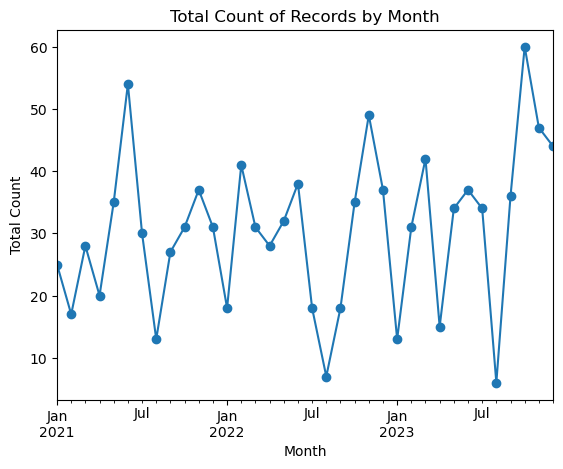

In [103]:
# Group by month and count the occurrences
counts_by_month = ec_data.groupby(ec_data['Date'].dt.to_period('M')).size()

# Plot the data
counts_by_month.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Total Count of Records by Month')

# Show plot
plt.show()

In [78]:
# Create a new column with 1 if 'Text' contains "ukraine", 0 otherwise
ec_data['Contains_Ukraine'] = ec_data['Text'].str.lower().str.contains('ukraine').astype(int)

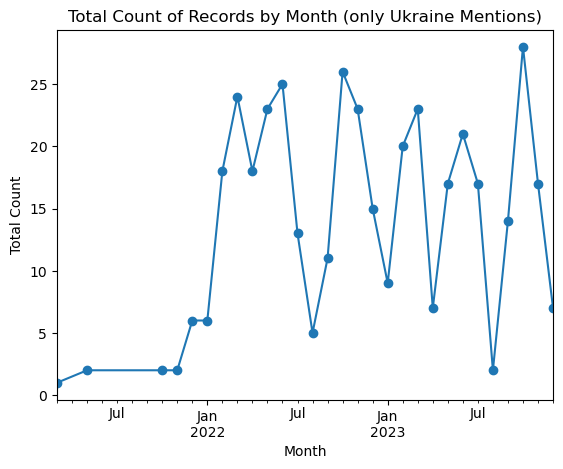

In [104]:
# Group by month and count the occurrences
counts_by_month = ec_data[ec_data.Contains_Ukraine == 1].groupby(ec_data[ec_data.Contains_Ukraine == 1]['Date'].dt.to_period('M')).size()

# Plot the data
counts_by_month.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Total Count of Records by Month (only Ukraine Mentions)')

# Show plot
plt.show()

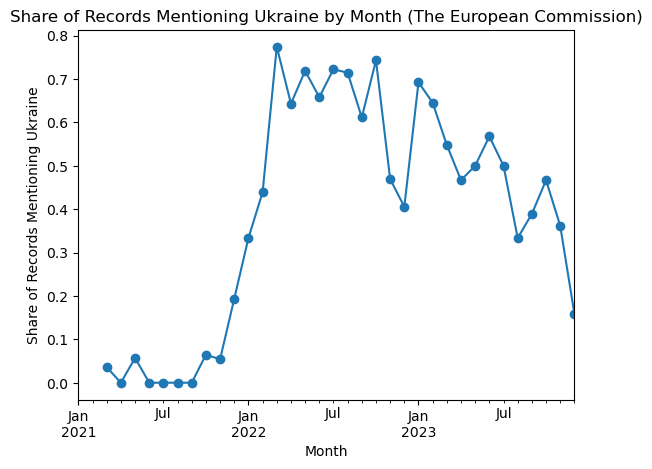

In [122]:
# Group by month and calculate total count of records and count of records mentioning Ukraine
counts_by_month = ec_data.resample('M', on='Date').size()
mentions_by_month = ec_data[ec_data['Contains_Ukraine'] == 1].resample('M', on='Date').size()

# Calculate the share of mentions by month
share_mentions_by_month = mentions_by_month / counts_by_month

# Plot the share of mentions by month
share_mentions_by_month.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Share of Records Mentioning Ukraine')
plt.title('Share of Records Mentioning Ukraine by Month (The European Commission)')

# Show plot
plt.show()

## The White House data

In [65]:
wh_data = pd.read_csv('data/thewhitehouse.csv')
wh_data.head()

,Title,Date,Category,Location,Text
0,Remarks by President Biden and Vice President ...,2024-02-03T22:00:00-05:00,Speeches and Remarks,Biden for President Campaign Headquarters; Wil...,"THE VICE PRESIDENT: Hello, Delaware! (Applau..."
1,Remarks by Vice President Harris at a Campaign...,2024-02-02T23:33:00-05:00,Speeches and Remarks,"South Carolina State University; Orangeburg, S...",THE VICE PRESIDENT: All right. Can we hear i...
2,Remarks by President Biden at a Political Even...,2024-02-01T20:24:19-05:00,Speeches and Remarks,"Region 1 Union Hall; Warren, Michigan","4:41 P.M. EST\n \nTHE PRESIDENT: Well, thank ..."
3,Remarks by President Biden at the National Pra...,2024-02-01T14:13:03-05:00,Speeches and Remarks,"U.S. Capitol; Washington, D.C.","9:04 A.M. EST\nTHE PRESIDENT: Frank, thank yo..."
4,Remarks by President Biden at a Campaign Recep...,2024-01-31T00:04:32-05:00,Speeches and Remarks,"Private Residence; Miami, Florida","6:27 P.M. EST\n\nTHE PRESIDENT: Well, Chris, t..."


In [67]:
# Convert date column to datetime
wh_data['Date'] = pd.to_datetime(wh_data['Date'], utc=True)

# Filter out dates between 2021 and 2023
wh_data = wh_data[(wh_data['Date'] >= '2021-01-01') & (wh_data['Date'] <= '2023-12-31')]

# Sort the dataset in the ascending order of date
wh_data = wh_data.sort_values(by = 'Date')

wh_data.head()

,Title,Date,Category,Location,Text
7134,Fact Sheet: President-elect Biden Outlines COV...,2021-01-15 21:17:00+00:00,Statements and Releases,NaN,Effectively and equitably vaccinating the U.S....
7132,Fact Sheet: List of Agency Actions for Review,2021-01-20 10:00:00+00:00,Statements and Releases,NaN,"Actions Address the COVID-19 Pandemic, Provide..."
7133,Fact Sheet: President-elect Biden’s Day One Ex...,2021-01-20 10:00:00+00:00,Statements and Releases,NaN,"Actions Address the COVID-19 Pandemic, Provide..."
7131,Fact Sheet: President Biden Sends Immigration ...,2021-01-20 12:23:00+00:00,Statements and Releases,NaN,The U.S. Citizenship Act of 2021 establishes a...
7130,"A Letter to Dr. Eric S. Lander, the President’...",2021-01-20 19:37:00+00:00,Statements and Releases,NaN,"On January 15, 2021, then-President-Elect Bide..."


In [96]:
# Check for null values in column Text
wh_data['Text'].isna().sum()

1

In [97]:
# Filter out 1 null value in column Text
wh_data = wh_data[wh_data.Text.notnull()]

In [ ]:
# TODO: handle this case: wh_data[wh_data.Location == '###']

In [68]:
# TODO: filter the locations?

In [74]:
wh_data.shape

(7849, 5)

/var/folders/k_/pt0pmhm97jx4hphkj9n4303w0000gn/T/ipykernel_80176/4176049276.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  counts_by_month = wh_data.groupby(wh_data['Date'].dt.to_period('M')).size()


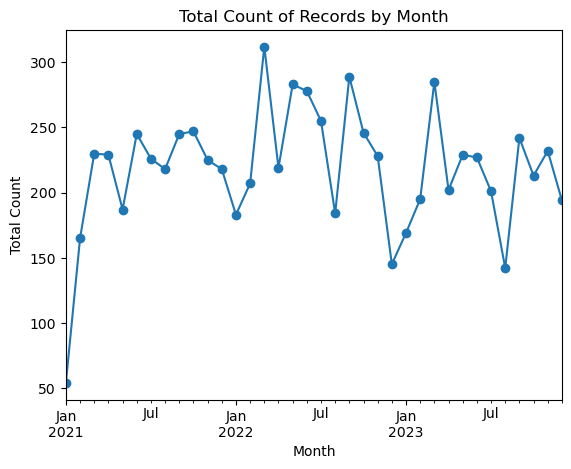

In [76]:
# Group by month and count the occurrences
counts_by_month = wh_data.groupby(wh_data['Date'].dt.to_period('M')).size()

# Plot the data
counts_by_month.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Total Count of Records by Month')

# Show plot
plt.show()

In [99]:
# Create a new column with 1 if 'Text' contains "ukraine", 0 otherwise
wh_data['Contains_Ukraine'] = wh_data['Text'].str.lower().str.contains('ukraine').astype(int)

/var/folders/k_/pt0pmhm97jx4hphkj9n4303w0000gn/T/ipykernel_80176/1950362059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wh_data['Contains_Ukraine'] = wh_data['Text'].str.lower().str.contains('ukraine').astype(int)


/var/folders/k_/pt0pmhm97jx4hphkj9n4303w0000gn/T/ipykernel_80176/882407106.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  counts_by_month = wh_data[wh_data.Contains_Ukraine == 1].groupby(wh_data[wh_data.Contains_Ukraine == 1]['Date'].dt.to_period('M')).size()


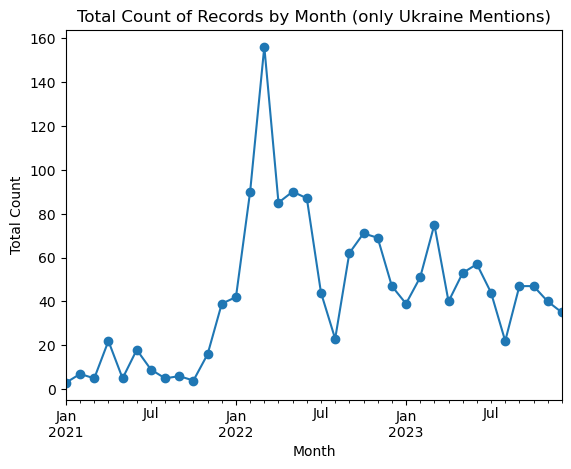

In [102]:
# Group by month and count the occurrences
counts_by_month = wh_data[wh_data.Contains_Ukraine == 1].groupby(wh_data[wh_data.Contains_Ukraine == 1]['Date'].dt.to_period('M')).size()

# Plot the data
counts_by_month.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Total Count of Records by Month (only Ukraine Mentions)')

# Show plot
plt.show()

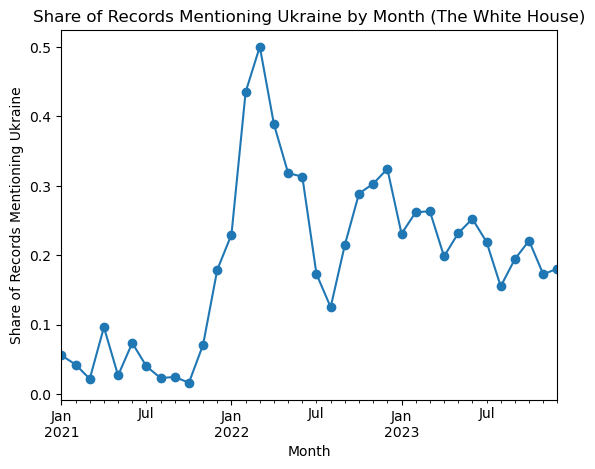

In [121]:
# Group by month and calculate total count of records and count of records mentioning Ukraine
counts_by_month = wh_data.resample('M', on='Date').size()
mentions_by_month = wh_data[wh_data['Contains_Ukraine'] == 1].resample('M', on='Date').size()

# Calculate the share of mentions by month
share_mentions_by_month = mentions_by_month / counts_by_month

# Plot the share of mentions by month
share_mentions_by_month.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Share of Records Mentioning Ukraine')
plt.title('Share of Records Mentioning Ukraine by Month (The White House)')

# Show plot
plt.show()

## NLP Pipeline

TODO:
- num of records by month and % of records that mention Ukraine (legend on Category) for both
- match the % of records with visits data and put lines on the days/months of visits